## Plot simulation results

In [16]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [17]:
# load datasets
exp_name = 'minitown_attack'
df  = pd.read_csv('%s.csv'%exp_name).set_index('timestamp') # with attacks
df0  = pd.read_csv('minitown_no_attacks.csv').set_index('timestamp') # no attacks

### Plot comparison attacks vs no attack

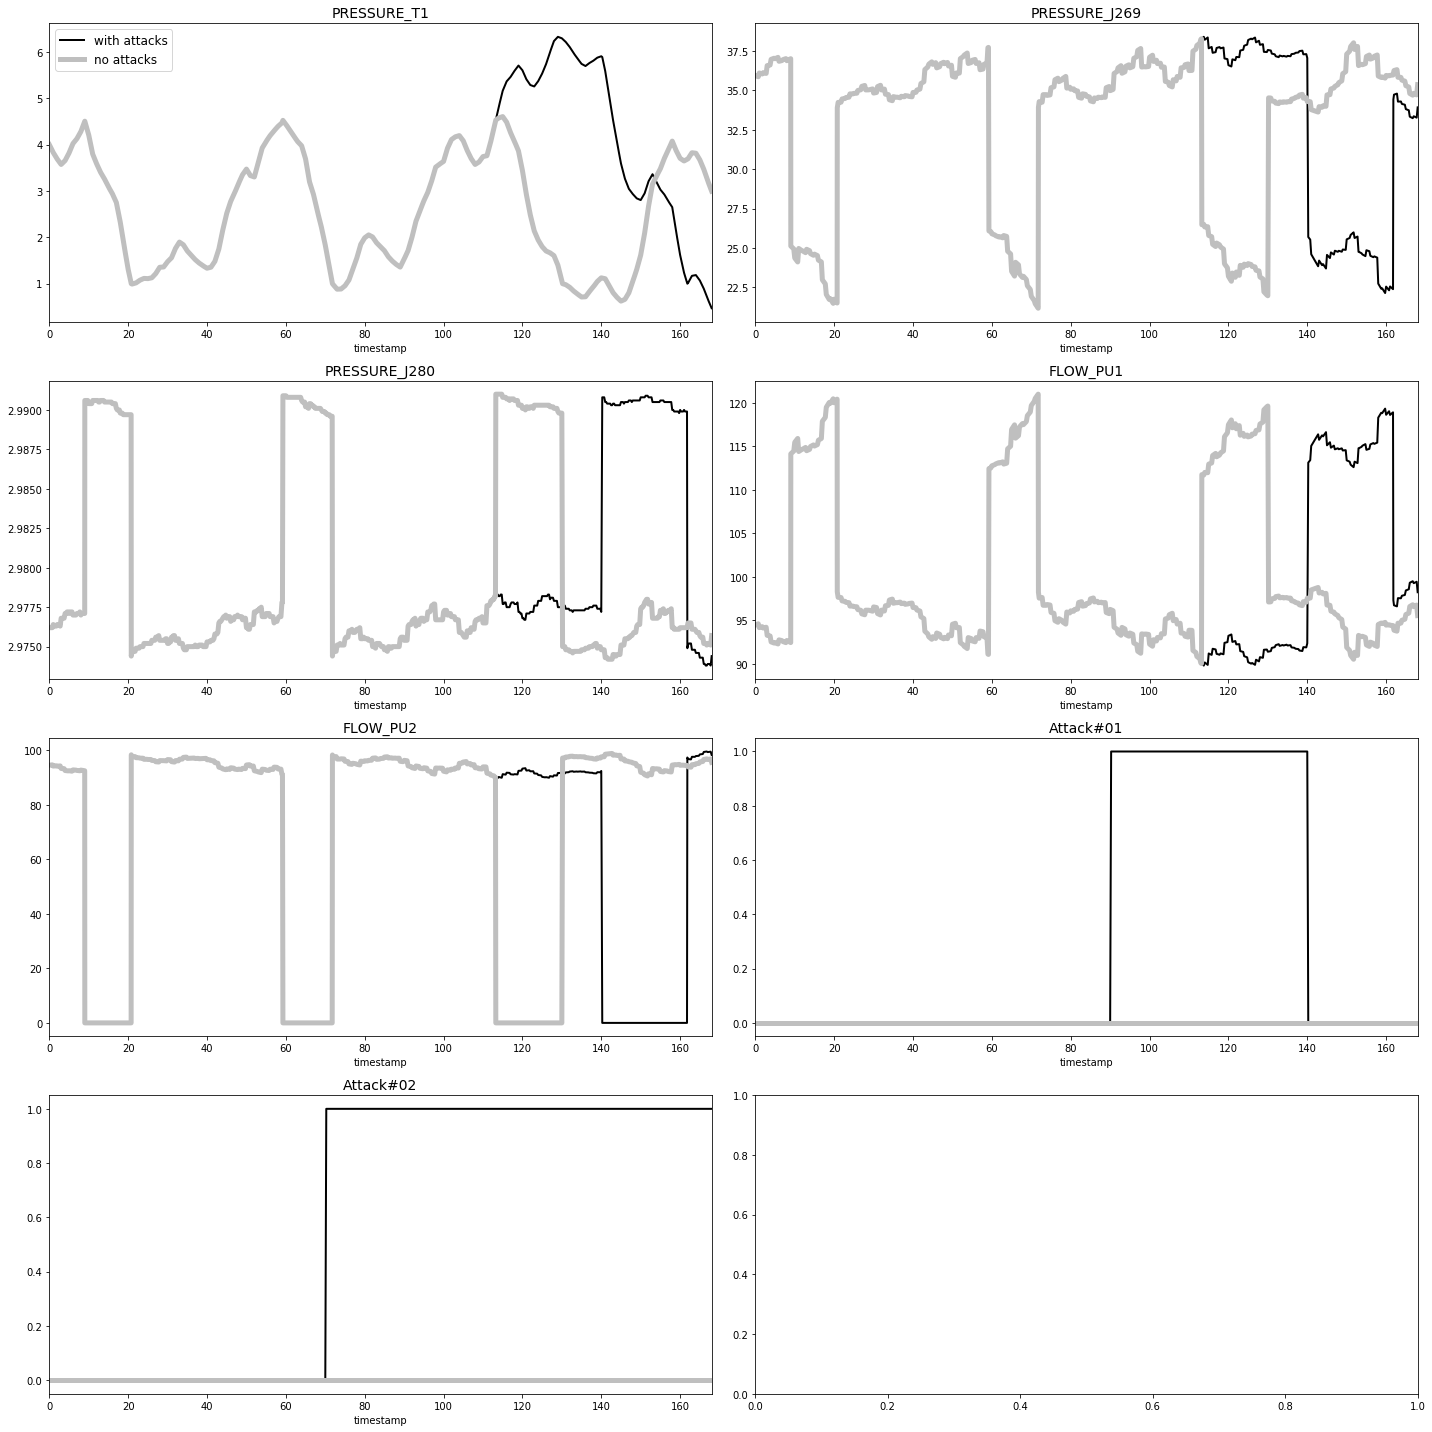

In [18]:
# compare simulations
columns = df.columns
ncols = 2
nrows = np.ceil(len(columns)/ncols).astype(int)
f, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (ncols*10, nrows*5))

for i, ax in enumerate(f.axes):
    if i == len(columns):
        break
    column = columns[i]
    df[column].plot(ax = ax, label = 'with attacks',color='k', linewidth = 2)
    try:
        df0[column].plot(ax = ax, label = 'no attacks',color='0.75', linewidth = 5)    
    except KeyError:
        ax.plot(df0.index,np.zeros(len(df0),), label = 'no attacks',color='0.75', linewidth = 5)    
        
    if i == 0:
        ax.legend(fontsize = 12, loc = 2)
    ax.set_title(column, fontsize = 14)

f.tight_layout()
# f.savefig('scenario01.pdf')
    

### Plot altered readings

In [19]:
# get data on altered readings
try:
    alt_df = pd.read_csv('%s_altered_readings.csv'%exp_name)
    alt_df.drop_duplicates(['timestamp','layer','sensor','variable'], keep = 'last', inplace = True)
except FileNotFoundError:
    raise Exception('No altered readings for %s. Interrupting Kernel.'%exp_name)

PLC1
SCADA


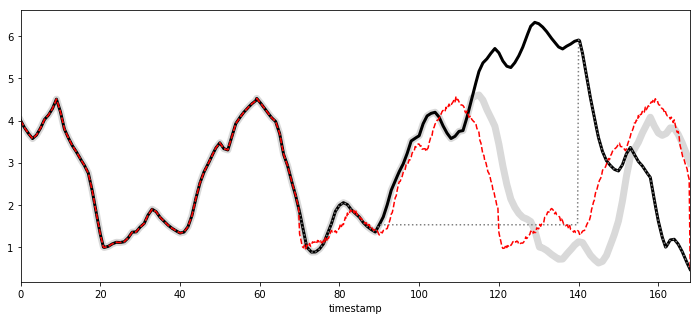

In [20]:
colors = ['0.5','r','g']
linestyles = [':','--','-.']

for tup, _ in alt_df.groupby(['variable','sensor']):
    # get sensor
    sensor = '{}_{}'.format(tup[0],tup[1])
    ixes0 = (alt_df['variable'] == tup[0]) & (alt_df['sensor'] == tup[1])
    
    # create subplot
    f, ax = plt.subplots(1,figsize=(12,5))
    
    # plot no attack
    df0[sensor].plot(ax = ax, label = 'no attacks',color='0.85', linewidth = 7)    
    # plot attack ground truth
    df[sensor].plot(ax = ax, label = 'ground truth',color='k',linestyle='-', linewidth = 3)
    # plot what PLCs and SCADA see
    altered_layers = sorted(alt_df[ixes0].layer.unique().tolist())
    for layer, color, style in zip(altered_layers,colors,linestyles):
        print(layer)
        temp0 = df[sensor].copy()
        ixes = (alt_df['layer'] == layer) & ixes0
        temp1 = alt_df[ixes][['timestamp','reading']].set_index('timestamp')
        temp0.loc[temp0.index.intersection(temp1.index)] = temp1.reading
        temp0.plot(ax=ax, label = 'Data seen by %s'%layer, color=color, linestyle=style)        
